In [11]:
import tensorflow as tf
from tensorflow import keras
import mnist_loader
import numpy as np
from itertools import product
from matplotlib import pyplot as plt

In [20]:
# Data pre-processing
# Both training and test data had to be split into their respective inputs and labels
# The labels (0-9) for the training data are encoded as one-hot vectors, these had to be changed to their integer value (digit classification)
"""
Output:
    train_inputs (each image is a 784-dimensional numpy.ndarray, 50000 images)
    train_labels (integer from 0-9)
    test_inputs (each image is a 784-dimensional numpy.ndarray, 10000 images)
    test_labels (integer from 0-9)
"""

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

training_data = list(training_data)
validation_data = list(validation_data)
test_data = list(test_data)

train_inputs = []
train_labels = []


for i in training_data:
    train_inputs.append(i[0])
    x = list(i[1])
    y = x.index(1)
    train_labels.append(y)

test_inputs = []
test_labels = []

for i in test_data:
    test_inputs.append(i[0])
    test_labels.append(i[1])

train_inputs = np.array(train_inputs)
train_labels = np.array(train_labels)
test_inputs = np.array(test_inputs)
test_labels = np.array(test_labels)

# train_inputs = np.squeeze(train_inputs, axis=-1)
# test_inputs = np.squeeze(test_inputs, axis=-1)



[5 0 4 ... 8 4 8]
[7 2 1 ... 4 5 6]


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.3967 - sparse_categorical_accuracy: 0.8921
Test Loss: 0.3967383801937103
Test Acc

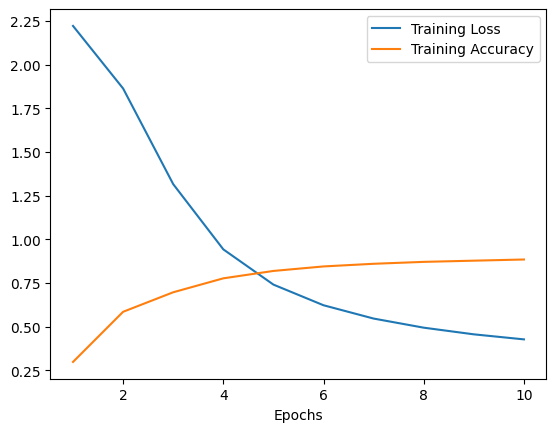

In [13]:
# Initial Model

my_nn_model = keras.Sequential()
my_nn_model.add(keras.layers.Flatten(input_shape=(784,)))
my_nn_model.add(keras.layers.Dense(128, activation='sigmoid'))
my_nn_model.add(keras.layers.Dense(64, activation='sigmoid'))
my_nn_model.add(keras.layers.Dense(10, activation='softmax'))

my_nn_model.summary()

my_nn_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["sparse_categorical_accuracy"])
# sparse_categorical_crossentropy is used as the loss function since the classified outputs of the model (0-9) are mutually exclusive


results = my_nn_model.fit(np.array(train_inputs), np.array(train_labels), epochs=10, verbose=False)
train_loss = results.history['loss']
train_acc = results.history['sparse_categorical_accuracy']
epochs = np.arange(1, 11)

test_loss, test_acc = my_nn_model.evaluate(np.array(test_inputs), np.array(test_labels))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.4059 - sparse_categorical_accuracy: 0.8872
Epochs trained: 10
Test Loss: 0.405880

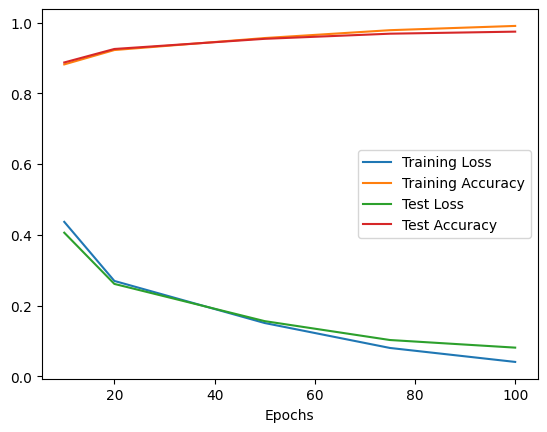

In [14]:
# Changing number of epochs
# Would expect overfitting as epochs increase

my_nn_model = keras.Sequential()
my_nn_model.add(keras.layers.Flatten(input_shape=(784, 1)))
my_nn_model.add(keras.layers.Dense(128, activation='sigmoid'))
my_nn_model.add(keras.layers.Dense(64, activation='sigmoid'))
my_nn_model.add(keras.layers.Dense(10, activation='softmax'))

my_nn_model.summary()

my_nn_model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["sparse_categorical_accuracy"])
# sparse_categorical_crossentropy is used as the loss function since the classified outputs of the model (0-9) are mutually exclusive


num_epochs = [10, 20, 50, 75, 100]

history = {}

for i in num_epochs:
    results = my_nn_model.fit(np.array(train_inputs), np.array(train_labels), epochs=i, verbose=False)

    test_loss, test_acc = my_nn_model.evaluate(np.array(test_inputs), np.array(test_labels))
    print("Epochs trained:", i)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)

    history[i] = [results.history['loss'][-1], results.history['sparse_categorical_accuracy'][-1], test_loss, test_acc]


plt.plot(list(history.keys()), list(y[0] for y in list(history.values())), label='Training Loss')
plt.plot(list(history.keys()), list(y[1] for y in list(history.values())), label='Training Accuracy')
plt.plot(list(history.keys()), list(y[2] for y in list(history.values())), label='Test Loss')
plt.plot(list(history.keys()), list(y[3] for y in list(history.values())), label='Test Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


Nodes in first hidden layer: 512  Nodes in second hidden layer 512
313/313 [==============================] - 1s 2ms/step - loss: 0.3573 - sparse_categorical_accuracy: 0.8974
Test Loss: 0.35728922486305237
Test Accuracy: 0.8974000215530396
Nodes in first hidden layer: 512  Nodes in second hidden layer 256
313/313 [==============================] - 1s 2ms/step - loss: 0.3583 - sparse_categorical_accuracy: 0.8979
Test Loss: 0.35831475257873535
Test Accuracy: 0.8978999853134155
Nodes in first hidden layer: 512  Nodes in second hidden layer 128
313/313 [==============================] - 1s 2ms/step - loss: 0.3589 - sparse_categorical_accuracy: 0.8990
Test Loss: 0.3589392602443695
Test Accuracy: 0.8989999890327454
Nodes in first hidden layer: 512  Nodes in second hidden layer 64
313/313 [==============================] - 1s 2ms/step - loss: 0.3738 - sparse_categorical_accuracy: 0.8964
Test Loss: 0.3738216161727905
Test Accuracy: 0.896399974822998
Nodes in first hidden layer: 512  Nodes in s

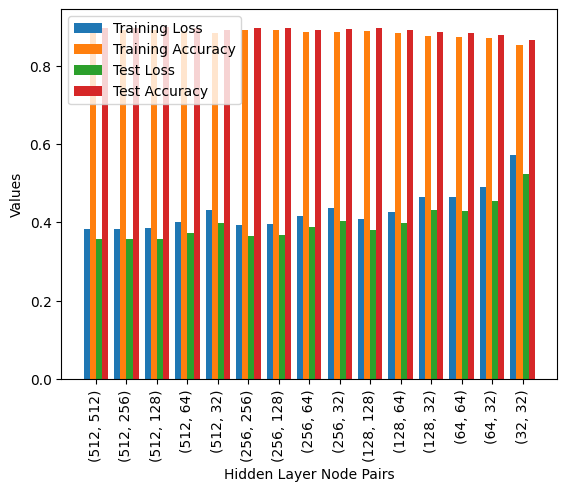

In [15]:
# Changing number of hidden units in each layer

hiddenLayer_numNodes = [512, 256, 128, 64, 32]

history1 = {}

for i in range(len(hiddenLayer_numNodes)):
    for j in range(i, len(hiddenLayer_numNodes)):
        print("Nodes in first hidden layer:", hiddenLayer_numNodes[i], " Nodes in second hidden layer", hiddenLayer_numNodes[j])

        my_nn_model = keras.Sequential()
        my_nn_model.add(keras.layers.Flatten(input_shape=(784, 1)))
        my_nn_model.add(keras.layers.Dense(hiddenLayer_numNodes[i], activation='sigmoid'))
        my_nn_model.add(keras.layers.Dense(hiddenLayer_numNodes[j], activation='sigmoid'))
        my_nn_model.add(keras.layers.Dense(10, activation='softmax'))

        # my_nn_model.summary()

        my_nn_model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["sparse_categorical_accuracy"])
        # sparse_categorical_crossentropy is used as the loss function since the classified outputs of the model (0-9) are mutually exclusive

        results = my_nn_model.fit(np.array(train_inputs), np.array(train_labels), epochs=10, verbose=False)

        test_loss, test_acc = my_nn_model.evaluate(np.array(test_inputs), np.array(test_labels))
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        history1[(hiddenLayer_numNodes[i], hiddenLayer_numNodes[j])] = [results.history['loss'][-1], results.history['sparse_categorical_accuracy'][-1], test_loss, test_acc]

keys = list(history1.keys())
values = list(history1.values())

values_array = np.array(values)
num_bars = len(keys)

bar_positions = np.arange(num_bars)
bar_width = 0.2  # Adjust as needed

# Create a bar for each data point
for i in range(len(values[0])):
    if i == 0:
        txt = "Training Loss"
    if i == 1:
        txt = "Training Accuracy"
    if i == 2:
        txt = "Test Loss"
    if i == 3:
        txt = "Test Accuracy"
    plt.bar(bar_positions + i * bar_width, values_array[:, i], width=bar_width, label=txt)


# Set up x-axis labels
plt.xticks(bar_positions + (len(values[0]) - 1) * bar_width / 2, [str(key) for key in keys])
plt.xticks(rotation='vertical')

plt.legend()
# Add labels and title
plt.xlabel('Hidden Layer Node Pairs')
plt.ylabel('Values')

# Show the plot
plt.show()


Bias: <keras.src.initializers.initializers.RandomNormal object at 0x143c85450>
Kernel: <keras.src.initializers.initializers.RandomNormal object at 0x13aeed250>
313/313 [==============================] - 1s 2ms/step - loss: 0.4347 - sparse_categorical_accuracy: 0.8817
Test Loss: 0.4346871078014374
Test Accuracy: 0.8816999793052673
Bias: <keras.src.initializers.initializers.RandomNormal object at 0x143c85450>
Kernel: <keras.src.initializers.initializers.Zeros object at 0x139c39a90>
313/313 [==============================] - 1s 2ms/step - loss: 1.7891 - sparse_categorical_accuracy: 0.2969
Test Loss: 1.789077877998352
Test Accuracy: 0.2969000041484833
Bias: <keras.src.initializers.initializers.RandomNormal object at 0x143c85450>
Kernel: <keras.src.initializers.initializers.Ones object at 0x139c39d90>
313/313 [==============================] - 1s 1ms/step - loss: 2.3059 - sparse_categorical_accuracy: 0.1135
Test Loss: 2.305889368057251
Test Accuracy: 0.11349999904632568
Bias: <keras.src.ini

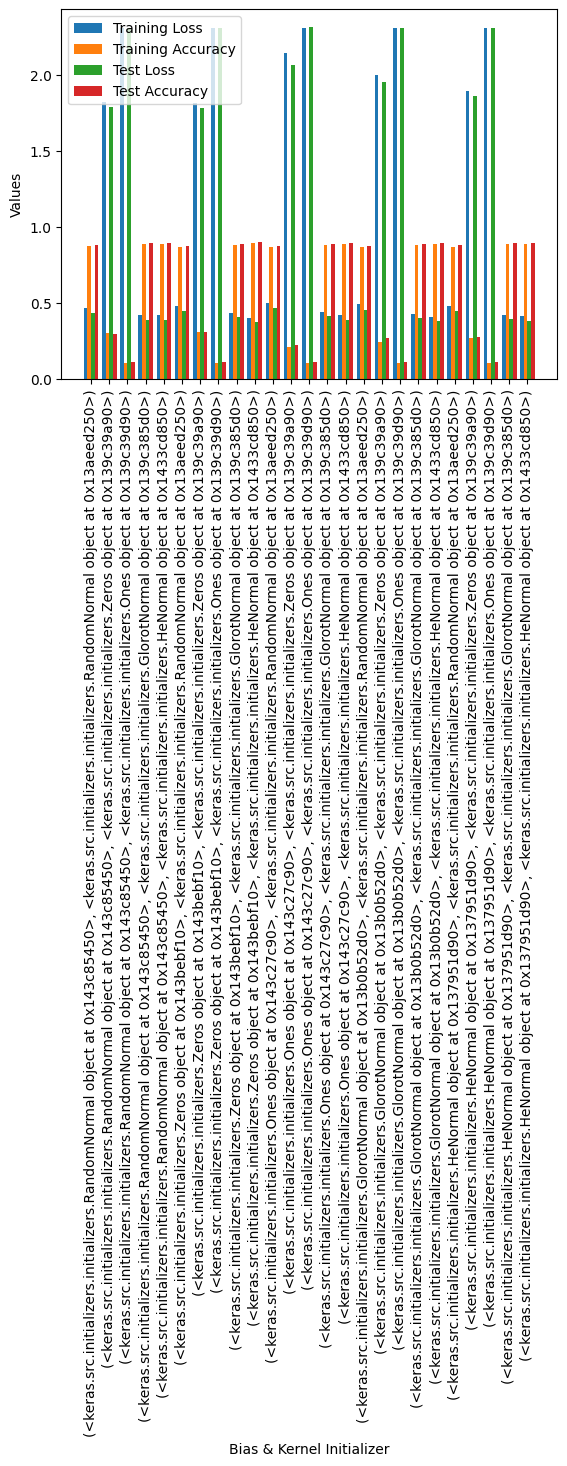

In [16]:
# Changing the weight/bias initializations

bias_inits = [keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2002), 
              keras.initializers.Zeros(), 
              keras.initializers.Ones(), 
              keras.initializers.GlorotNormal(seed=2002), 
              keras.initializers.HeNormal(seed=2002)]

weight_inits = [keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2002), 
              keras.initializers.Zeros(), 
              keras.initializers.Ones(), 
              keras.initializers.GlorotNormal(seed=2002), 
              keras.initializers.HeNormal(seed=2002)]

history2 = {}

for i in bias_inits:
    for j in weight_inits:
        print("Bias:", i)
        print("Kernel:", j)
        my_nn_model = keras.Sequential()
        my_nn_model.add(keras.layers.Flatten(input_shape=(784, 1)))
        my_nn_model.add(keras.layers.Dense(128, activation='sigmoid', kernel_initializer=j, bias_initializer=i))
        my_nn_model.add(keras.layers.Dense(64, activation='sigmoid', kernel_initializer=j, bias_initializer=i))
        my_nn_model.add(keras.layers.Dense(10, activation='softmax'))

        # my_nn_model.summary()

        my_nn_model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["sparse_categorical_accuracy"])
        # sparse_categorical_crossentropy is used as the loss function since the classified outputs of the model (0-9) are mutually exclusive

        results = my_nn_model.fit(np.array(train_inputs), np.array(train_labels), epochs=10, verbose=False)

        test_loss, test_acc = my_nn_model.evaluate(np.array(test_inputs), np.array(test_labels))
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        history2[(i, j)] = [results.history['loss'][-1], results.history['sparse_categorical_accuracy'][-1], test_loss, test_acc]
        # Key = (bias initializer, kernel initializer)

keys = list(history2.keys())
values = list(history2.values())

values_array = np.array(values)
num_bars = len(keys)

bar_positions = np.arange(num_bars)
bar_width = 0.2  # Adjust as needed

# Create a bar for each data point
for i in range(len(values[0])):
    if i == 0:
        txt = "Training Loss"
    if i == 1:
        txt = "Training Accuracy"
    if i == 2:
        txt = "Test Loss"
    if i == 3:
        txt = "Test Accuracy"
    plt.bar(bar_positions + i * bar_width, values_array[:, i], width=bar_width, label=txt)


# Set up x-axis labels
plt.xticks(bar_positions + (len(values[0]) - 1) * bar_width / 2, [str(key) for key in keys])
plt.xticks(rotation='vertical')

plt.legend()
# Add labels and title
plt.xlabel('Bias & Kernel Initializer')
plt.ylabel('Values')

# Show the plot
plt.show()


Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_47 (Flatten)        (None, 784)               0         
                                                                 
 dense_141 (Dense)           (None, 128)               100480    
                                                                 
 dense_142 (Dense)           (None, 64)                8256      
                                                                 
 dense_143 (Dense)           (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9694
Optimizer used: <keras.src.optimizers

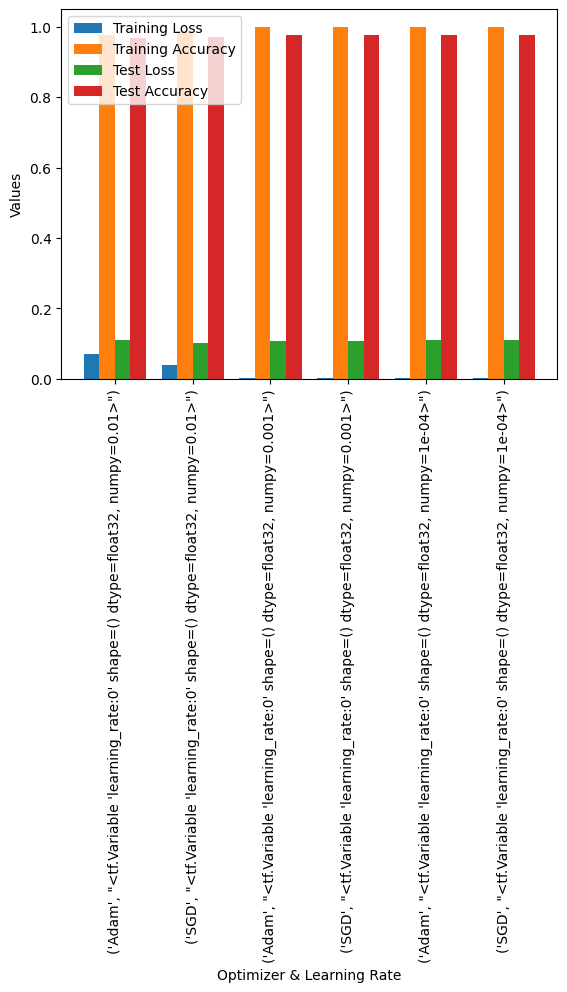

In [17]:
# Changing learning rates and optimizer

my_nn_model = keras.Sequential()
my_nn_model.add(keras.layers.Flatten(input_shape=(784, 1)))
my_nn_model.add(keras.layers.Dense(128, activation='sigmoid'))
my_nn_model.add(keras.layers.Dense(64, activation='sigmoid'))
my_nn_model.add(keras.layers.Dense(10, activation='softmax'))

my_nn_model.summary()

__optimizer = []
learning_rates = [0.01, 0.001, 0.0001]
for i in learning_rates:
    __optimizer.append(tf.keras.optimizers.Adam(learning_rate=i))
    __optimizer.append(tf.keras.optimizers.SGD(learning_rate=i))

history3 = {}

for i in __optimizer:
    my_nn_model.compile(loss="sparse_categorical_crossentropy",
                optimizer=i,
                metrics=["sparse_categorical_accuracy"])
    # sparse_categorical_crossentropy is used as the loss function since the classified outputs of the model (0-9) are mutually exclusive

    results = my_nn_model.fit(np.array(train_inputs), np.array(train_labels), epochs=10, verbose=False)

    test_loss, test_acc = my_nn_model.evaluate(np.array(test_inputs), np.array(test_labels))
    print("Optimizer used:", i, ". Learning rate used:", i.learning_rate)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)

    history3[(str(i.name), str(i.learning_rate))] = [results.history['loss'][-1], results.history['sparse_categorical_accuracy'][-1], test_loss, test_acc]

keys = list(history3.keys())
values = list(history3.values())

values_array = np.array(values)
num_bars = len(keys)

bar_positions = np.arange(num_bars)
bar_width = 0.2  # Adjust as needed

# Create a bar for each data point
for i in range(len(values[0])):
    if i == 0:
        txt = "Training Loss"
    if i == 1:
        txt = "Training Accuracy"
    if i == 2:
        txt = "Test Loss"
    if i == 3:
        txt = "Test Accuracy"
    plt.bar(bar_positions + i * bar_width, values_array[:, i], width=bar_width, label=txt)


# Set up x-axis labels
plt.xticks(bar_positions + (len(values[0]) - 1) * bar_width / 2, [str(key) for key in keys])
plt.xticks(rotation='vertical')

plt.legend()
# Add labels and title
plt.xlabel('Optimizer & Learning Rate')
plt.ylabel('Values')

# Show the plot
plt.show()
